In [157]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = [13,7]

In [158]:
df = pd.read_csv("dataset/bank-full.csv",sep=";")

In [159]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43218,60,admin.,married,secondary,no,12980,no,no,cellular,5,mar,115,1,-1,0,unknown,yes
42692,57,management,married,tertiary,no,1318,no,no,cellular,18,jan,91,2,94,3,success,no
18484,47,management,married,tertiary,no,2261,no,no,cellular,31,jul,87,2,-1,0,unknown,no
22677,36,management,married,tertiary,no,3874,no,no,cellular,25,aug,425,6,-1,0,unknown,no
25774,56,unemployed,married,primary,no,107,yes,no,cellular,19,nov,149,1,-1,0,unknown,no


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Questão 1
**Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?**

In [161]:
# Caso tenha empréstimo, seja pessoal ou imobiliário, a coluna `any_loan` armazena "yes"
df['any_loan'] = df.apply(lambda row: "yes" if ((row['housing']=='yes')or(row['loan']=='yes')) else "no",axis=1)

In [162]:
jobs,percentage_loans = [],[]
# Para cada profissão, armazena-se qual porcentagem de pessoas tem empréstimos
for job,total in zip(df['job'].value_counts().index,df['job'].value_counts().values):
    jobs.append(job)
    count_loans = df[(df['job']=="{}".format(job))&(df['any_loan']=="yes")].shape[0]
    percentage_loans.append(float('{:.2f}'.format((count_loans/total)*100)))

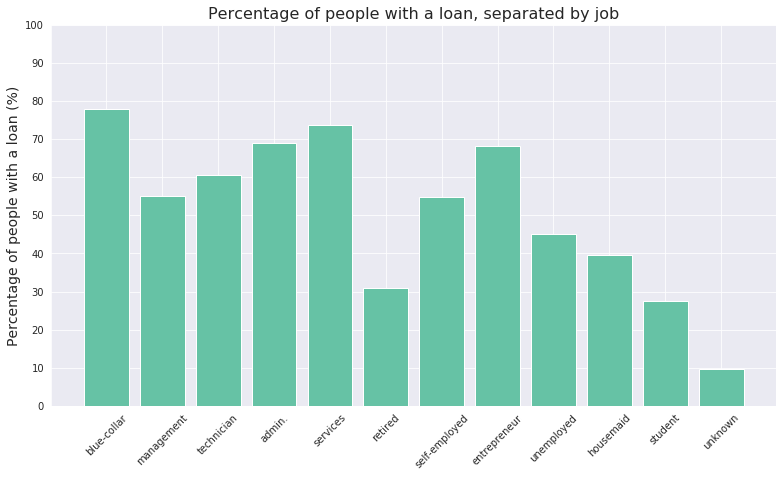

In [163]:
# Gráfico com o percentual de pessoas com empréstimo separado por profissão
plt.bar(range(len(percentage_loans)),percentage_loans)
plt.xticks(range(len(percentage_loans)),jobs,rotation=45)
plt.yticks(range(0,101,10))
plt.ylabel("Percentage of people with a loan (%)",fontsize=14)
plt.title("Percentage of people with a loan, separated by job",fontsize=16)
plt.savefig("images/1_percentageByJob.png")

In [164]:
# Informações que irão compor o Diagrama de Venn do report, respondendo a pergunta "De qual tipo?"
union = df[(df['job']=='blue-collar')&(df['any_loan']=='yes')].shape[0]
personal = df[(df['job']=='blue-collar')&(df['loan']=='yes')&(df['housing']=='no')].shape[0]
housing = df[(df['job']=='blue-collar')&(df['housing']=='yes')&(df['loan']=='no')].shape[0]
intersection = union - (personal + housing)
print("União: {}\nInterseção: {} ({:.2f}%)\nSomente empréstimos pessoais: {} ({:.2f}%)\nSomente empréstimos imobiliários: {} ({:.2f}%)".format(union,intersection,intersection/union*100,personal,personal/union*100,housing,housing/union*100))

União: 7599
Interseção: 1133 (14.91%)
Somente empréstimos pessoais: 551 (7.25%)
Somente empréstimos imobiliários: 5915 (77.84%)


### Questão 2
**Fazendo uma relação entre número de contatos e sucesso da campanha quais
são os pontos relevantes a serem observados?**

In [165]:
# Transforma 'yes' em 1 e 'no' em 0
def binarize(df,list_columns):
    for col in list_columns:
        df[col] = np.where(df[col]=='yes',1,0)

binarize(df,['housing','loan','any_loan','default','y'])

In [166]:
df.corr()['y']

age         0.025155
default    -0.022419
balance     0.052838
housing    -0.139173
loan       -0.068185
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
y           1.000000
any_loan   -0.159092
Name: y, dtype: float64

In [167]:
df.corr()['campaign']

age         0.004760
default     0.016822
balance    -0.014578
housing    -0.023599
loan        0.009980
day         0.162490
duration   -0.084570
campaign    1.000000
pdays      -0.088628
previous   -0.032855
y          -0.073172
any_loan   -0.014998
Name: campaign, dtype: float64

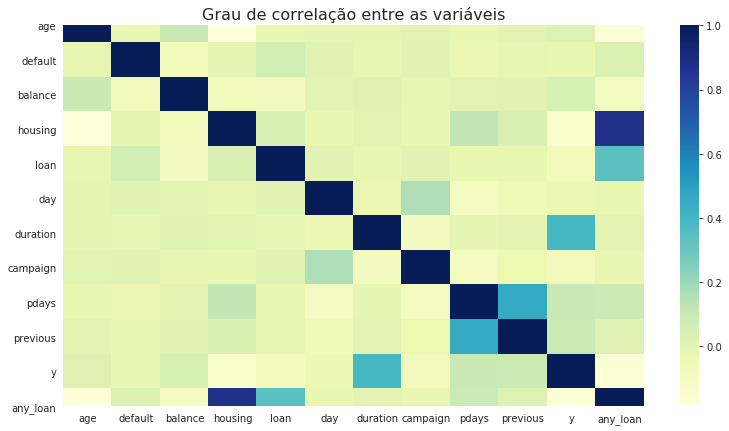

In [168]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Grau de correlação entre as variáveis",fontsize=16)
plt.savefig("images/2_heatmapCorr.png")

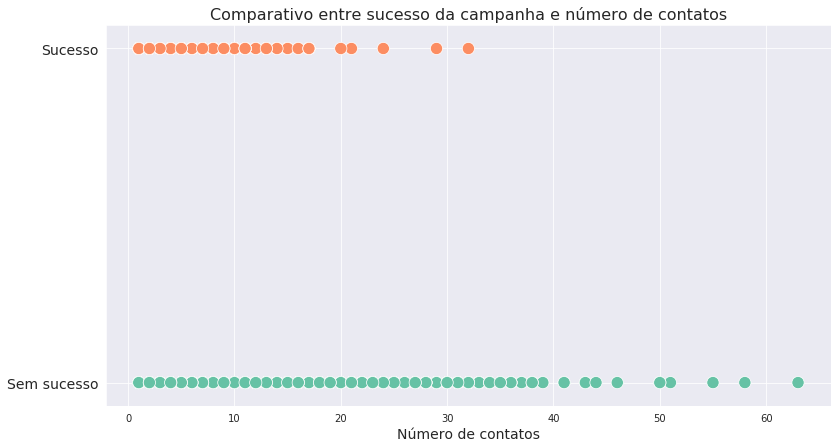

In [169]:
sns.scatterplot(y='y',x='campaign',hue='y',data=df,s=150)
plt.yticks([0,1],['Sem sucesso','Sucesso'],fontsize=14)
plt.ylabel("")
plt.xlabel("Número de contatos",fontsize=14)
plt.title("Comparativo entre sucesso da campanha e número de contatos",fontsize=16)
plt.legend().set_visible(False)
plt.savefig("images/2_scatterSucesso.png")

### Questão 3
**Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?**

In [170]:
print("Número médio de ligações: {}\nNúmero máximo de ligações: {}\nMediana: {}".format(int(round(df[df['y']==1]['campaign'].mean())),df[df['y']==1]['campaign'].max(),int(df[df['y']==1]['campaign'].median())))

Número médio de ligações: 2
Número máximo de ligações: 32
Mediana: 2


### Questão 4 
**O resultado da campanha anterior tem relevância na campanha atual?**

In [171]:
df.corr()['previous']

age         0.001288
default    -0.018329
balance     0.016674
housing     0.037076
loan       -0.011043
day        -0.051710
duration    0.001203
campaign   -0.032855
pdays       0.454820
previous    1.000000
y           0.093236
any_loan    0.023593
Name: previous, dtype: float64

In [172]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [173]:
print("Resultado da campanha anterior diferente de 'unknown' corresponde a {:.2f}% do total de observações".format((df[df['poutcome']!='unknown'].shape[0]/df.shape[0])*100))

Resultado da campanha anterior diferente de 'unknown' corresponde a 18.25% do total de observações


In [174]:
# Encoding da coluna `poutcome`
dict_encoding = {"poutcome": {"failure": 0, "success": 1, "other": 2, "unknown": -1}}
df.replace(dict_encoding, inplace=True)

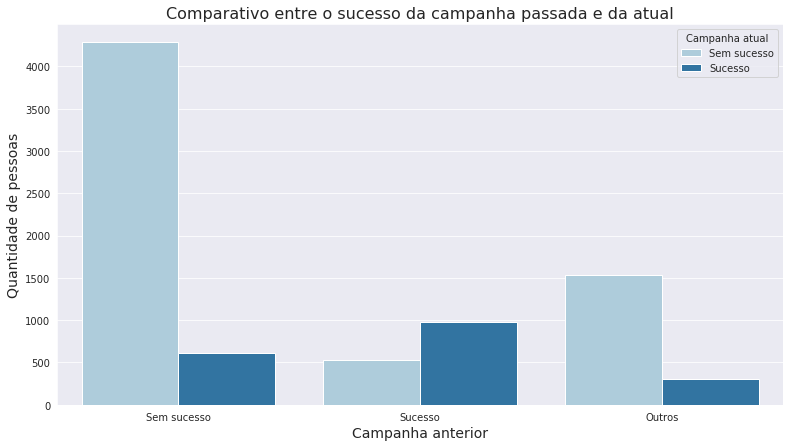

In [177]:
sns.countplot(x='poutcome',hue='y',data=(df[df['poutcome']!=-1]),palette="Paired")
plt.xticks([0,1,2],['Sem sucesso','Sucesso','Outros'])
plt.xlabel("Campanha anterior",fontsize=14)
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.title("Comparativo entre o sucesso da campanha passada e da atual",fontsize=16)
plt.legend(title="Campanha atual",labels=['Sem sucesso','Sucesso'])
plt.savefig("images/4_barCampanhaPassada.png")

### Questão 5 
**Qual o fator determinante para que o banco exija um seguro de crédito?**

### Questão 6 
**Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?**

In [146]:
imob = df[df['housing']==1].copy()

**Idade**

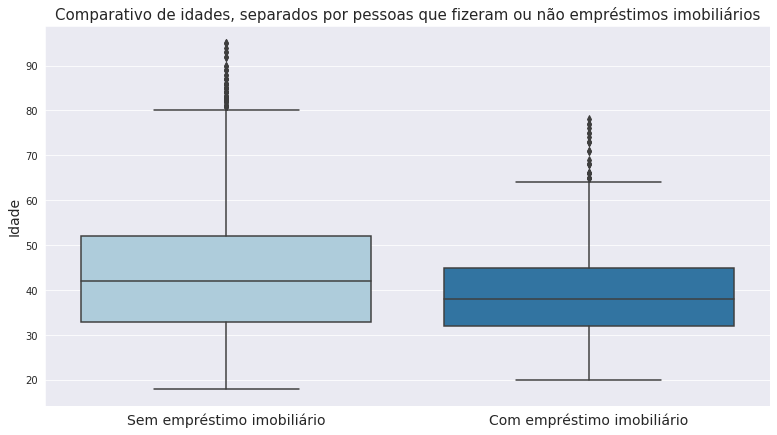

In [181]:
sns.boxplot(y='age',x='housing',data=df,palette='Paired')
plt.xticks([0,1],['Sem empréstimo imobiliário','Com empréstimo imobiliário'],fontsize=14)
plt.xlabel("")
plt.ylabel("Idade",fontsize=14)
plt.title("Comparativo de idades, separados por pessoas que fizeram ou não empréstimos imobiliários",fontsize=15)
plt.savefig("images/6_idade.png")

In [180]:
print("Idade mínima: {}\nIdade máxima: {}\nIdade média: {}".format(imob['age'].min(),imob['age'].max(),int(round(imob['age'].mean()))))

Idade mínima: 20
Idade máxima: 78
Idade média: 39


**Emprego**

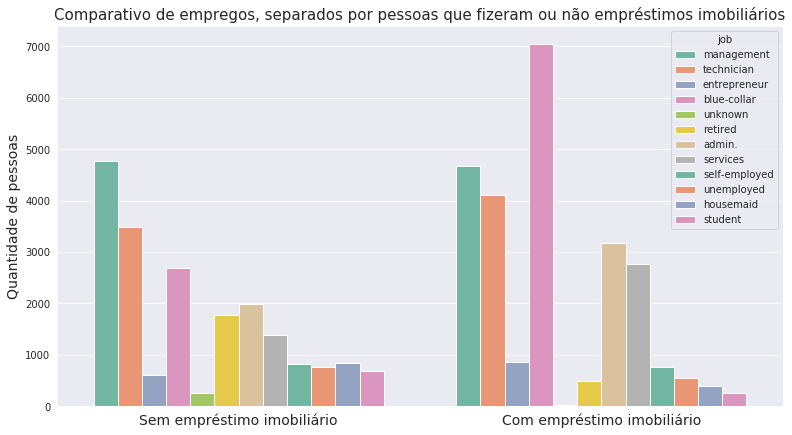

In [189]:
sns.countplot(hue='job',x='housing',data=df,palette='Set2')
plt.xticks([0,1],['Sem empréstimo imobiliário','Com empréstimo imobiliário'],fontsize=14)
plt.xlabel("")
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.title("Comparativo de empregos, separados por pessoas que fizeram ou não empréstimos imobiliários",fontsize=15)
plt.savefig("images/6_job.png")

**Estado Civil**

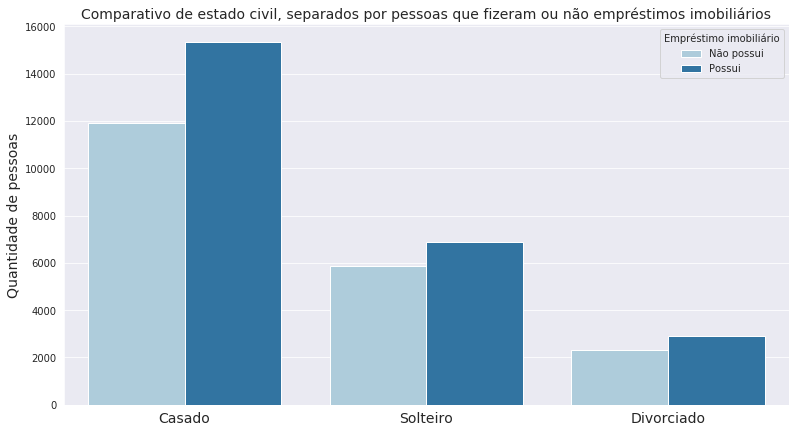

In [207]:
sns.countplot(x='marital',hue='housing',data=df,palette='Paired')
plt.xticks([0,1,2],['Casado','Solteiro','Divorciado'],fontsize=14)
plt.xlabel("")
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.title("Comparativo de estado civil, separados por pessoas que fizeram ou não empréstimos imobiliários",fontsize=14)
plt.legend(title="Empréstimo imobiliário",labels=['Não possui','Possui'])
plt.savefig("images/6_estadoCivil.png")

**Educação**

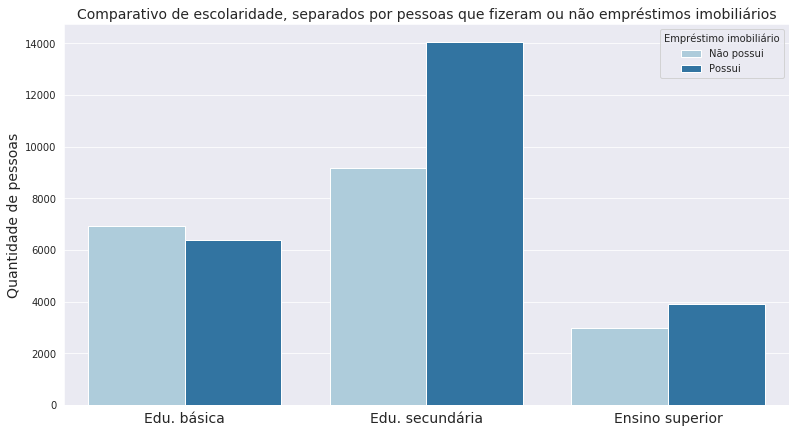

In [208]:
sns.countplot(x='education',hue='housing',data=df[df['education']!='unknown'],palette='Paired')
plt.xticks([0,1,2],['Edu. básica','Edu. secundária','Ensino superior'],fontsize=14)
plt.xlabel("")
plt.ylabel("Quantidade de pessoas",fontsize=14)
plt.title("Comparativo de escolaridade, separados por pessoas que fizeram ou não empréstimos imobiliários",fontsize=14)
plt.legend(title="Empréstimo imobiliário",labels=['Não possui','Possui'])
plt.savefig("images/6_educacao.png")